## Data Pre-Processing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Importing Dataset

In [2]:
df = pd.read_csv('customers.csv', index_col = 0, header = 0)
df

,Gender,Age,Annual Income,Spending Score
1,Male,19.0,5394935.0,39.0
2,Male,NaN,NaN,NaN
3,Female,20.0,6763233.0,6.0
4,NaN,23.0,8541890.0,77.0
5,Female,31.0,13817666.0,40.0
...,...,...,...,...
196,Female,35.0,17835424.0,79.0
197,Female,45.0,27392608.0,28.0
198,Male,32.0,13328628.0,74.0
199,Male,32.0,6753625.0,18.0


#### Missing Data

In [3]:
nullc = df.isnull().sum()
nullc[nullc != 0]

Gender            16
Age               20
Annual Income     20
Spending Score    25
dtype: int64

In [4]:
df['Gender'].fillna(value = df['Gender'].mode()[0], inplace = True)
df['Age'].fillna(value = float(df['Age'].mean()), inplace = True)
df['Annual Income'].fillna(value = float(df['Annual Income'].median()), inplace = True)
df['Spending Score'].fillna(value = float(df['Spending Score'].mean()), inplace = True)

In [5]:
nullc = df.isnull().sum()
nullc[nullc != 0]

Series([], dtype: int64)

#### Outlier Detection

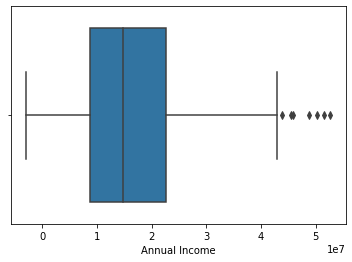

In [6]:
# Box Plot
sns.boxplot(x = df['Annual Income'])
plt.show()

In [7]:
df = df[df['Annual Income'] < 3e7]
df.shape

(170, 4)

#### Redundant Data

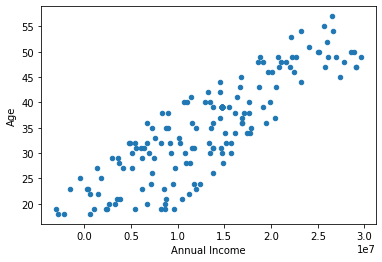

In [8]:
df.plot.scatter('Annual Income', 'Age')
plt.show()

In [9]:
# Age is redundant as it can be derived from Annual Income
df = df.drop(['Age'], axis = 1)
df

,Gender,Annual Income,Spending Score
1,Male,5394935.0,39.000000
2,Male,14736912.5,50.702857
3,Female,6763233.0,6.000000
4,Female,8541890.0,77.000000
5,Female,13817666.0,40.000000
...,...,...,...
196,Female,17835424.0,79.000000
197,Female,27392608.0,28.000000
198,Male,13328628.0,74.000000
199,Male,6753625.0,18.000000


#### Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
df

,Gender,Annual Income,Spending Score
1,Male,0.257759,0.387755
2,Male,0.544505,0.507172
3,Female,0.299758,0.051020
4,Female,0.354353,0.775510
5,Female,0.516289,0.397959
...,...,...,...
196,Female,0.639611,0.795918
197,Female,0.932962,0.275510
198,Male,0.501278,0.744898
199,Male,0.299463,0.173469
